# 5/1 축약된 두문자 헤더 교체하기

## data01.csv 파일의 축약된 두문자 헤더에 대한 설명을 추가한 csv 데이터 파일을 만드시오.

### 출력해야할 내용
### 1. data01과 header01의 교집합 헤더 개수는?
### 2. data01과 header01의 교집합에 들어 있지 않는 data01의 헤더명은? 이를 mismatch 헤더라고 하자.
### 3. mismatch 헤더 중 header02에 들어있어 추가할 수 있는 헤더 개수는?
### 4. 최종적으로 전처리된 데이터 파일의 헤더 개수는?


#### data01.csv: 축약된 두문자 헤더를 포함하는 데이터 파일
#### header01.csv: 데이터 파일의 거의 대부분 헤더 설명이 있는 파일
#### header02.csv: header01.csv에는 없는 몇몇 헤더 설명이 있는 파일




In [50]:
import csv

data_rdr = csv.reader(open('data01.csv', 'rt'))
header_rdr = csv.reader(open('header01.csv', 'rt', encoding= 'cp949'))

data_rows = [d for d in data_rdr]
header_rows = [h for h in header_rdr]

print(len(data_rows[0]))
print(len(header_rows))

155
203


In [51]:
# bad_rows에 데이터와 일치하지 않는 헤더 목록 만들기
bad_rows = []

for h in header_rows:
    if h[0] not in data_rows[0]:
        bad_rows.append(h)

len(bad_rows)

58

In [52]:
# 헤더(설명) 파일에서 일치하지 않는 헤더 제거
for h in bad_rows:
    header_rows.remove(h)

print('data01과 header01의 교집합 헤더 개수:', len(header_rows))

data01과 header01의 교집합 헤더 개수: 145


In [53]:
# 정리된 헤더 목록에 없는 데이터 헤더 목록 찾기
all_short_headers = [h[0] for h in header_rows]

miss_matches = []

for header in data_rows[0]:
    if header not in all_short_headers:
        miss_matches.append(header)
        #print('mismatch', header)

print('data01과 header01의 교집합에 들지 않는 data01의 헤더명', miss_matches)

data01과 header01의 교집합에 들지 않는 data01의 헤더명 ['MWB5', 'MDV1F', 'MMA6', 'MTA8E', 'mwelevel', 'mnweight', 'wscoreu', 'windex5u', 'wscorer', 'windex5r']


In [54]:
data_rdr =  csv.reader(open('data01.csv', 'rt'))
header_rdr = csv.reader(open('header02.csv', 'rt', encoding= 'cp949'))


# list comprehension
data_rows = [d for d in data_rdr]
# 데이터에 없는 헤더는 제거하고 헤더 리스트를 만든다.
header_rows2 = [h for h in header_rdr if h[0] in data_rows[0]]

# 두 헤더의 길이 출력
print(len(data_rows[0]))
print(len(header_rows2))

print('mismatcg 헤더 중 header2에 들어있어 추가할 수 있는 헤더 개수:',len(header_rows2))

155
4
mismatcg 헤더 중 header2에 들어있어 추가할 수 있는 헤더 개수: 4


In [55]:
header_rows = header_rows + header_rows2

len(header_rows)

149

In [62]:
skip_index = []
all_short_headers = [h[0] for h in header_rows]

for header in data_rows[0]:
    if header not in all_short_headers:
        index = data_rows[0].index(header)
        skip_index.append(index)

new_data = []
for row in data_rows:
    new_row = []
    for i, d in enumerate(row):
        if i not in skip_index:
            new_row.append(d)
    new_data.append(new_row)

len(new_data[0])

149

In [63]:
data_headers = []

for i, header in enumerate(data_rows[0]):
    if i not in skip_index:
        data_headers.append(header)

In [64]:
for i, header in enumerate(data_headers):
    if header not in all_short_headers[i]:
        print(header, all_short_headers[i])

MWB5 MMT2
MMT2 MMT3
MMT3 MMT4
MMT4 MMT6
MMT6 MMT7
MMT7 MMT8
MMT8 MMT9
MMT9 MMT10
MMT10 MMT11
MMT11 MMT12
MMT12 MMT13
MMT13 MMT14
MMT14 MCM1
MCM1 MCM3
MCM3 MCM4
MCM4 MCM5A
MCM5A MCM5B
MCM5B MCM6
MCM6 MCM7A
MCM7A MCM7B
MCM7B MCM8
MCM8 MCM9A
MCM9A MCM9B
MCM9B MCM10
MCM10 MCM11A
MCM11A MCM11B
MCM11B MCM12M
MCM12M MCM12Y
MCM12Y MDV1A
MDV1A MDV1B
MDV1B MDV1C
MDV1C MDV1D
MDV1D MDV1E
MDV1E MMA1
MDV1F MMA3
MMA1 MMA4
MMA3 MMA5
MMA4 MMA8M
MMA5 MMA8Y
MMA6 MMA9
MMA8M MSB1
MMA8Y MSB2
MMA9 MSB3U
MSB1 MSB3N
MSB2 MSB4
MSB3U MSB5
MSB3N MSB8
MSB4 MSB9
MSB5 MSB10
MSB8 MSB13
MSB9 MSB14
MSB10 MSB15
MSB13 MHA1
MSB14 MHA2
MSB15 MHA3
MHA1 MHA4
MHA2 MHA5
MHA3 MHA6
MHA4 MHA7
MHA5 MHA8A
MHA6 MHA8B
MHA7 MHA8C
MHA8A MHA9
MHA8B MHA10
MHA8C MHA11
MHA9 MHA12
MHA10 MHA24
MHA11 MHA25
MHA12 MHA26
MHA24 MTA1
MHA25 MTA2
MHA26 MTA3
MMC1 MTA4
MMC2 MTA5
MMC3 MTA6
MMC4 MTA7
MTA1 MTA8A
MTA2 MTA8B
MTA3 MTA8C
MTA4 MTA8D
MTA5 MTA8X
MTA6 MTA9
MTA7 MTA10
MTA8A MTA11
MTA8B MTA12A
MTA8C MTA12B
MTA8D MTA12C
MTA8E MTA12X
MTA8X MTA13
MTA

In [65]:
skip_index = []
final_header_rows = []
all_short_headers = [h[0] for h in header_rows]

for header in data_rows[0]:
    if header not in all_short_headers:
        index = data_rows[0].index(header)
        skip_index.append(index)
    else:
        for head in header_rows:
            if head[0] == header:
                final_header_rows.append(head)
                break

print('최종적으로 전처리된 데이터파일의 헤더 개수:',len(final_header_rows))

In [66]:
header1 =[]
for row in final_header_rows:
    header1.append(row[1])

In [67]:
new_data.insert(1, header1)

In [68]:
import pandas as pd

df = pd.DataFrame(new_data)
df.to_csv('dataheader.csv', index = False)

# 5/8 누락 데이터를 평가 및 처리

## 1. 타이나닉호에서 승선한 도시를 나타내는 embark_town 열에서 누락 데이터가 있는지 평가하여 있는지 평가하여 있으면 그 개수를 출력하시오.

In [69]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

In [72]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [71]:
nan_count = titanic['embark_town'].isnull().sum()
print(nan_count)

2


## 2. 누락 데이터 중 앞에서부터 발견한 첫 번째 누락 데이터에 대해 그 앞뒤 2개씩 총 5개의 승선도시를 출력하시오.

In [78]:
# 누락 데이터 중 앞에서부터 발견한 첫 번째 누락 데이터에 대해 그 앞뒤 2개씩 총 5개의 승선도시를 출력하시오.
missing_index = titanic['embark_town'].index[titanic['embark_town'].isnull()].tolist()[0]

print("누락된 데이터 앞뒤의 승선도시:")
print(titanic.loc[missing_index - 2 : missing_index + 2, 'embark_town'])

누락된 데이터 앞뒤의 승선도시:
59    Southampton
60      Cherbourg
61            NaN
62    Southampton
63    Southampton
Name: embark_town, dtype: object


In [79]:
#  누락 데이터 중 앞에서부터 발견한 첫 번째 누락 데이터에 대해 그 앞뒤 2개씩 총 5개의 승선도시를 출력하시오.
titanic[titanic['embark_town'].isnull()].head(5)

titanic[59:64]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
59,0,3,male,11.0,5,2,46.9000,S,Third,child,False,NaN,Southampton,no,False
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
61,1,1,female,38.0,0,0,80.0000,NaN,First,woman,False,B,NaN,yes,True
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False
63,0,3,male,4.0,3,2,27.9000,S,Third,child,False,NaN,Southampton,no,False


## 3. 승선 도시 중 가장 많이 승선한 도시를 찾아서 출력하시오.

In [83]:
# 승선 도시 중 가장 많이 승선한 도시를 찾아서 출력하시오.
embark_counts = titanic['embark_town'].value_counts()

most_common_embark_town = embark_counts.idxmax()

print("가장 많이 승선한 도시:", most_common_embark_town)

가장 많이 승선한 도시: Southampton


## 4. 승선도시 최빈값으로 모든 누락 데이터를 대체하고, 앞의 5개 데이터를 다시 출력하시오.

In [85]:
# 승선도시 최빈값으로 모든 누락 데이터를 대체하고, 앞의 5개 데이터를 다시 출력하시오.
titanic['embark_town'].fillna(most_common_embark_town, inplace = True)

print(titanic.loc[missing_index - 2 : missing_index + 2, 'embark_town'])

59    Southampton
60      Cherbourg
61    Southampton
62    Southampton
63    Southampton
Name: embark_town, dtype: object


# 5/15 이상치 추출 자동화 코드
## 파일을 데이터프레임으로 읽고, 데이터형이 float64인 열들에 대해 이상치 평가를 하여 이상치가 존재하는 열이 있으면, 아래 titanic 예시와 같이 열이름을 출력하도록 자동화 코드를 작성하시오.
## 이상치 평가는 평균에서 +- 표준편차 밖에 있는 값으로 계산한다.
### ex) titanic = age outlier: OK 이런 식으로 해서 age, fare
### ex) iris = sepal_width outlier: OK

In [ ]:
import pandas as pd

def detect_outliers(df):
    float_columns = df.select_dtypes(include=['float64']).columns

    outlier_columns = []

    for col in float_columns:
        mean = df[col].mean()
        std = df[col].std()
        lower_bound = mean - 3 * std
        upper_bound = mean + 3 * std

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            outlier_columns.append(f"{col} outlier: OK")

    for result in outlier_columns:
        print(result)

# 5/22 Web Scraping
## 옥션 ebay쇼핑 웹페이지에서 베스트핫딜 상품을 크롤링하여 해당 상품의 제품명과 가격을 웹스크래핑으로 20개 상품만 수집하고 데이터프레임으로 만들어 출력하시오.

### http://ebay.auction.co.kr/plan/hotdeal

In [95]:
import requests
from bs4 import BeautifulSoup

url = 'http://ebay.auction.co.kr/plan/hotdeal'
response = requests.get(url)

data = BeautifulSoup(response.text, 'html.parser')

In [97]:
div = data.find('div', class_ = 'content')


name_list = div.select('div.best-hot2 > div > div > div > div.con-box > dl > dt')
price_list = div.select('div.best-hot2 > div > div > div > div.con-box > p > strong')

real_name = []
real_price = []


for name, price in zip(name_list, price_list):
    real_name.append(name.text)
    real_price.append(price.text)

import pandas as pd
df = pd.DataFrame(columns=['name', 'price'])
df['name'] = real_name
df['price'] = real_price

In [98]:
df

,name,price
0,[빈티지 마텔 바비 해피 패밀리 스마트..],$125.00
1,[반스앤노블 누크 글로우라이트4 32g],$99.99
2,[LG XO3QBK XBOOM 블루투스 스피커],$135.00
3,['47브랜드' LA다저스 모자],$25.99
4,[디올 DIOR STELLAIRE 4 여성용 선글라스 로..],$149.95
5,[마샬 - 미들턴 블루투스 휴대용 스피..],$236.99
6,[AHR 오픈페이스 모터사이클 헬멧 장착 ..],$79.90
7,[뉴발란스 남성 프레쉬 폼 스니커즈],$47.24
8,[디즈니 더 퍼스트 챕터 부스터 팩],$9.80
9,[리복 글라이드 신발],$43.71


# 5/29 데이터 전처리

## sibsp와 parch 열은 각각 형제자매와 부모자식이 몇 명 있는지에 대한 답변이다. 이 두 개의 변수를 통해 가족이 있는가라는 질문에 대한 답을 알고 싶다면 차원 축소가 가능한 사례인가?
### seaborn에서 제공하는 titanic 사용


In [1]:
import seaborn as sns

titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 가족 family라는 변수 하나로 feature extraction하고, 위 2개의 변수를 삭제한 후 그 데이터프레임을 출력하시오. 단, family 변수는 가족이 있으면 1, 없으면 0으로 값을 가지도록 구현합니다.
### seaborn에서 제공하는 titanic 사용


In [2]:
titanic['family'] = titanic['sibsp'] + titanic['parch']
titanic['family'] = titanic['family'].apply(lambda x: 1 if x > 0 else 0)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,1
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


## 시각화를 통해 정규성 검정하여 해당 feature가 정규분포에 가까움을 시각화하여 보여주고, 해당 feature를 표준화하여 변경하고 그 데이터프레임을 출력하시오.

In [5]:
iris = sns.load_dataset('iris')

<Axes: xlabel='sepal_width', ylabel='Density'>

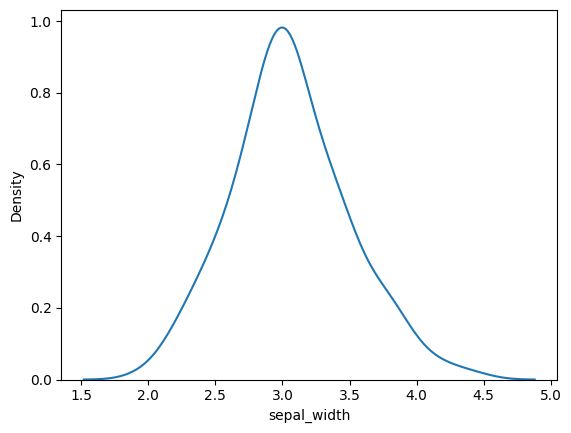

In [11]:
sns.kdeplot(data = iris['sepal_width'].dropna())

In [12]:
mean = iris['sepal_width'].mean()
std = iris['sepal_width'].std()

iris['sepal_width'] = (iris['sepal_width'] - mean) / std

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,1.015602,1.4,0.2,setosa
1,4.9,-0.131539,1.4,0.2,setosa
2,4.7,0.327318,1.3,0.2,setosa
3,4.6,0.097889,1.5,0.2,setosa
4,5.0,1.245030,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,-0.131539,5.2,2.3,virginica
146,6.3,-1.278680,5.0,1.9,virginica
147,6.5,-0.131539,5.2,2.0,virginica
148,6.2,0.786174,5.4,2.3,virginica


# 6/5 구간 분할

## fare 변수의 최소값, 25%, 50%, 75% 사분위값 및 최대값을 경계로 4개 구간으로 분할하고, 구간 분할된 변수명을 fare_abce라고 한다. fare와 fare_abcd만 2개 열에 대해 앞에서 10개 행 출력한다.
## 단, 구간별 라벨은 비싼 요금부터 A, B, C, D로 하자
### seaborn에서 제공하는 titanic 데이터셋 fare 변수에 대해

In [17]:
import pandas as pd
import numpy as np

# 주어진 구간 경계값
bin = [0, 7.9104, 14.4542, 31.0, 512.3292]

count, bin_dividers = np.histogram(titanic['fare'], bins=bin)

print(count, bin_dividers)

[223 217 226 225] [  0.       7.9104  14.4542  31.     512.3292]


In [18]:
titanic['fare_abcd'] = pd.cut(titanic['fare'], bins=bin_dividers, labels=['D', 'C', 'B', 'A'])

## 범주형 변수 fare_abcd에 대해 더미 변수를 만들고, 이들 4개 더미변수들에 대해서만 앞에서부터 10개 행을 출력하시오.

In [19]:
origin_dummies = pd.get_dummies(titanic['fare_abcd'])

origin_dummies.head(10)

,D,C,B,A
0,True,False,False,False
1,False,False,False,True
2,False,True,False,False
3,False,False,False,True
4,False,True,False,False
5,False,True,False,False
6,False,False,False,True
7,False,False,True,False
8,False,True,False,False
9,False,False,True,False
